In [50]:
install.packages("rworldmap")
library(rworldmap)
library(openxlsx)


The downloaded binary packages are in
	/var/folders/jb/jxztdls55vncm84hp50zf9n40000gn/T//Rtmp1ayXNg/downloaded_packages


In [53]:
install.packages('animation')
library(animation)

also installing the dependency ‘magick’





The downloaded binary packages are in
	/var/folders/jb/jxztdls55vncm84hp50zf9n40000gn/T//Rtmp1ayXNg/downloaded_packages


In [40]:
df <- read.xlsx("../data/data_covid_fix_name.xlsx")

154 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
89 codes from the map weren't represented in your data


154 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
89 codes from the map weren't represented in your data


Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォント

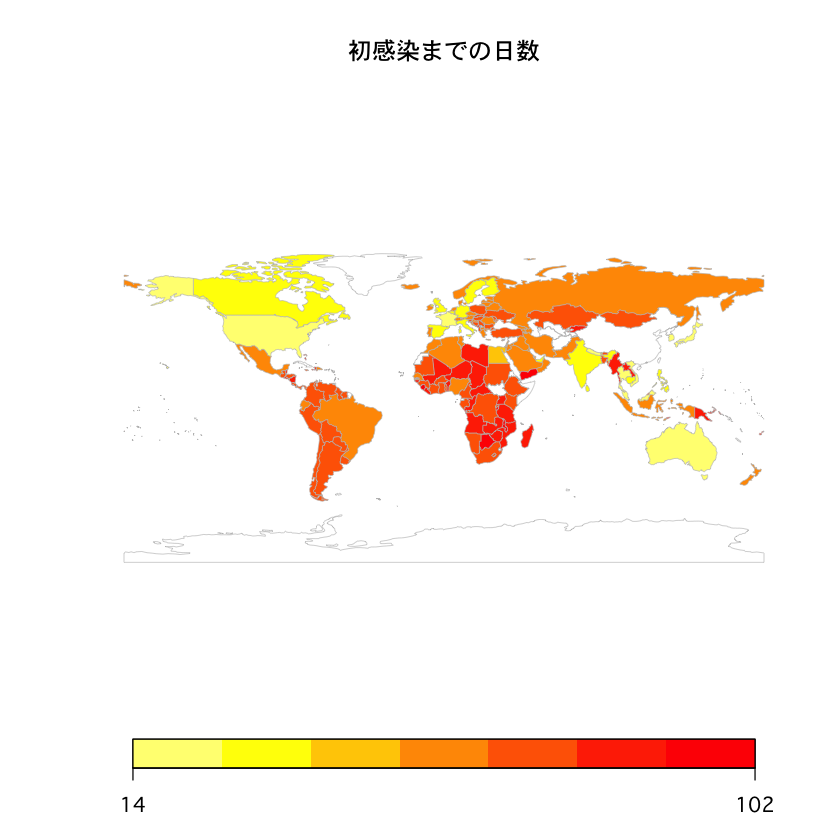

In [6]:
map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="date_first"
               , catMethod="fixedWidth"
               , mapTitle = "初感染までの日数"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

- date_firstがmaxの値を用意する(ここでは150とする)
- 150×155(国の数)の行列を用意(matrix)

- for 文を回す
1. dfの1行目のdata_firstを取得。(_data_first)
2. matrixの_data_first(70列目)以降に_data_firstを代入
....
3. dfのi行目のdata_firstを取得。(_data_first)
4. matrixの_data_first(xx列目)以降に_data_firstを代入

In [15]:
max(df$date_first)

[1] 102

In [93]:
# 102
max_date = max(df$date_first)
# 14
min_date = min(df$date_first)
# カラムの長さの決定(値が全部0の列があると後々map作成時に色塗りができない)
len_col = max_date - min_date
# 155×88の行列の生成
date_first_matrix = matrix(0, nrow=155, ncol=len_col) 

In [96]:
for (i in 1: nrow(date_first_matrix)) { 
    i_date_first = df[i,]$date_first
    date_first_matrix[i,( i_date_first - min_date) : ncol(date_first_matrix)] = i_date_first
}

In [99]:
df_date_first = as.data.frame(date_first_matrix)
df_date_first["country"] = df["country"]
map_obj <- joinCountryData2Map(df_date_first, joinCode="NAME", nameJoinColumn="country")

154 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
89 codes from the map weren't represented in your data


In [ ]:
saveGIF({
  for (day in 1:ncol(date_first_matrix))
  {
    mapCountryData(map_obj, 
                   nameColumnToPlot = paste("V",as.character(day), sep = ""), 
                   catMethod="fixedWidth",
                  )
  }
  
}, interval = 0.3, movie.name = "../map/world_temp_change.gif", ani.width = 800, ani.height = 600 )
